In [1]:
#import all the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helpers as dsfh
import missingno as msno
from pyaxis import pyaxis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import predhelp as ph
from sklearn.preprocessing import PolynomialFeatures
fp = r"../data/px-x-1003020000_101.px" 

In [2]:
#define the region we want to analyse and three competitors
saanen = ph.get_region(fp,"Saanen","St. Moritz","Arosa","Zermatt")


In [3]:
#import the weather data from three different stations
weather_chd = ph.weather_clean("../data/WeatherBetter/chd.csv")
weather_gsg = ph.weather_clean("../data/WeatherBetter/gsg.csv")
weather_zwe = ph.weather_clean("../data/WeatherBetter/zwe.csv")


In [4]:
#define our variables 
gdp = ph.gdp_clean("../data/gdpPC.csv")
xrate = ph.forex_clean("../data/SNB_Xrate_20y.csv")
unemployment = ph.unemployment_clean("../data/Unemployment_rate.csv")

['Chile'] has one or multiple NaN values


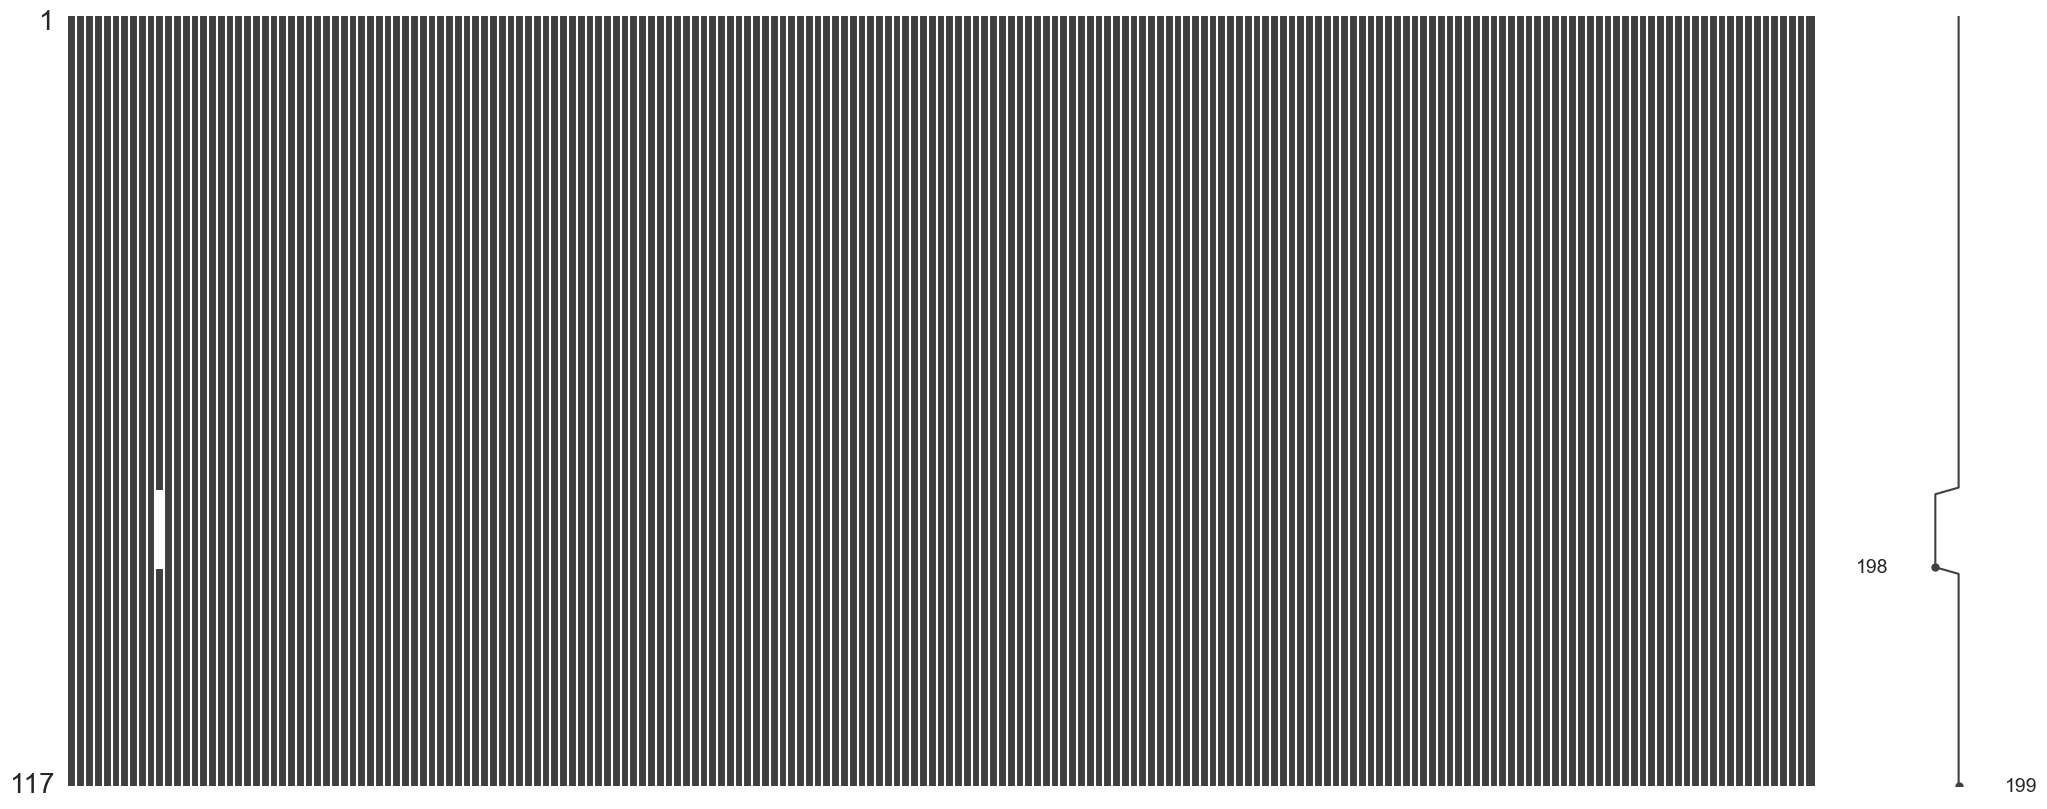

In [11]:
#use pandas concat to merge all our dataframes into the total_df
total_df = pd.concat([saanen, gdp, xrate, unemployment, weather_chd, weather_gsg, weather_zwe], axis=1, verify_integrity=False, copy=False).drop_duplicates()
#delete columns that are present in multiple dataframes. With this we make sure not to have one column multiple times in our total_df
total_df = total_df.loc[:,~total_df.columns.duplicated()].copy()
total_df.set_index("DATE")
#check whether we still have na_values in our total_df
ph.show_na(total_df)
plt.show()

In [12]:
# given Chile has NaN values throughout a considerable amount of rows we decide to drop it
total_df.drop(columns="Chile", inplace=True)

In [13]:
#save our total_df in our cleaned data file
total_df.to_csv("../data/total_df.csv")